In [3]:
# 1. Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [4]:
# 2. Load Data
df = pd.read_csv("data/retail_store_inventory.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.year == 2023]


In [5]:
# 3. Preprocessing
# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [6]:
# Encode categorical variables
le_weather = LabelEncoder()
df['Weather Condition'] = le_weather.fit_transform(df['Weather Condition'])

In [7]:

# Select subset (example: Store 1, Category 'Grocery')
df_sc = df[(df['Store ID'] == 'S001') & (df['Category'] == 'Groceries')].copy()

In [8]:
# 4. Feature Engineering (basic)
features = [
    'Year', 'Month', 'Day', 'DayOfWeek',
    'Weather Condition', 'Holiday/Promotion', 'Price'
]
X = df_sc[features]
y = df_sc['Inventory Level']

In [9]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
# 6. Model Training with Grid Search
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}
gs = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
model = gs.best_estimator_

In [11]:
# 7. Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("MAE:", mae)
print("R² Score:", r2)

Train RMSE: 118.96054742808359
Test RMSE: 135.01759470307923
MAE: 116.60353776605665
R² Score: -0.02200926373581713


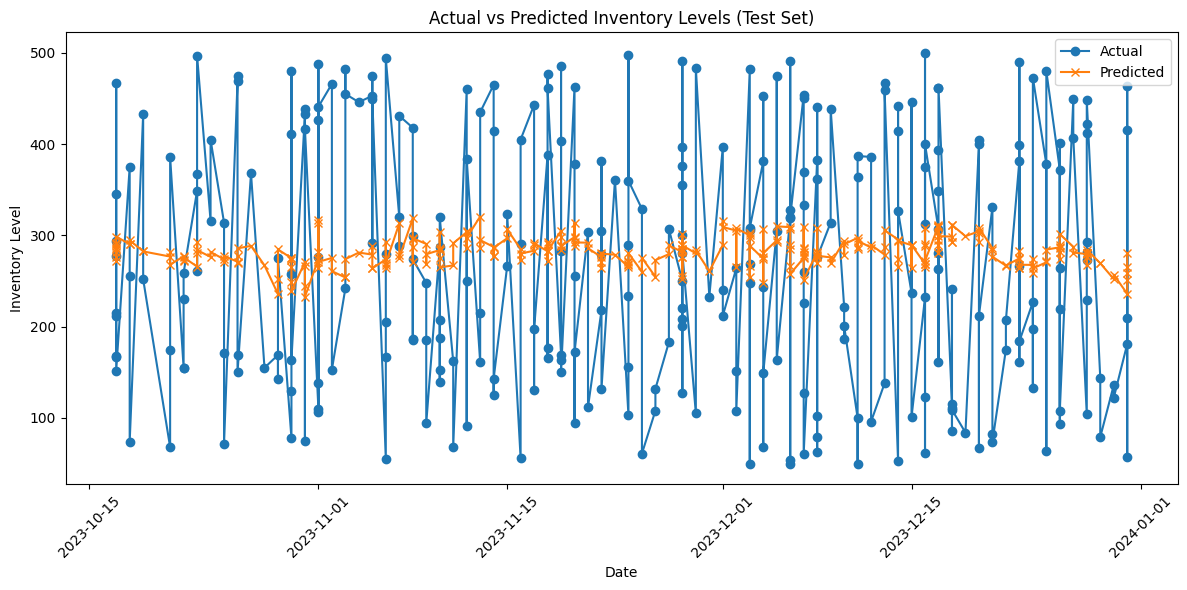

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_sc.loc[y_test.index, 'Date'], y_test.values, label='Actual', marker='o')
plt.plot(df_sc.loc[y_test.index, 'Date'], y_test_pred, label='Predicted', marker='x')
plt.xlabel("Date")
plt.ylabel("Inventory Level")
plt.title("Actual vs Predicted Inventory Levels (Test Set)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


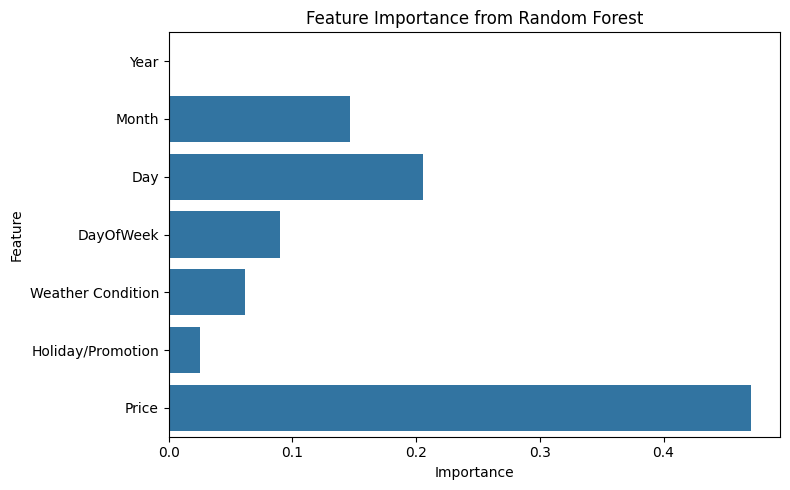

In [14]:
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
